In [10]:
from brian2 import *
import sys 
sys.path.append('..')

from DynapSE import DynapSE
from Spike_G import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Display plots inside Jupyter cell
%matplotlib inline 
# Set the dots-per-inch (resolution) of the images
mpl.rcParams['figure.dpi'] = 90
from equations.dynapse_eq import *
from parameters.dynapse_param import *

# C++ code generation for faster spiking network simulation
set_device('cpp_standalone')

# Ignore Brian2 base warnings/dynapse-simulator-New-Parameters/

BrianLogger.suppress_name('base')
# The clock of Brian2 simulation for numerically solve ODEs
defaultclock.dt = 20 * us

In [11]:

def SFA(ampa_conf,adaptation_conf,freq_list):    
    device.reinit()
    device.activate()
    defaultclock.dt = 20 * us

    ## Observing Adaptation Effect
    ##################
    inp_duration=1

    # Create a Brian2 network and chip instance and neurons-
    network = Network()
    chip = DynapSE(network)
    DPI_neurons  = chip.get_neurons(len(freq_list), 'Core_1')

    DPI_synapses=[]
    



    Spike_gen_1=SpikeGen('regular',0,1,1,freq_list[0],1,'SpikeGenerator'+str(1))
    DPI_synapses.append(chip.add_connection(Spike_gen_1,DPI_neurons[0:1], synapse_type='AMPA_STD'))
    chip.connect(DPI_synapses[0], True)
    DPI_synapses[0].weight = 5


    Spike_gen_2=SpikeGen('regular',0,1,1,freq_list[1],1,'SpikeGenerator'+str(2))
    DPI_synapses.append(chip.add_connection(Spike_gen_2,DPI_neurons[1:2], synapse_type='AMPA_STD'))
    chip.connect(DPI_synapses[1], True)
    DPI_synapses[1].weight = 5


    Spike_gen_3=SpikeGen('regular',0,1,1,freq_list[2],1,'SpikeGenerator'+str(3))
    DPI_synapses.append(chip.add_connection(Spike_gen_3,DPI_neurons[2:3], synapse_type='AMPA_STD'))
    chip.connect(DPI_synapses[2], True)
    DPI_synapses[2].weight = 5


    Spike_gen_4=SpikeGen('regular',0,1,1,freq_list[3],1,'SpikeGenerator'+str(4))
    DPI_synapses.append(chip.add_connection(Spike_gen_4,DPI_neurons[3:4], synapse_type='AMPA_STD'))
    chip.connect(DPI_synapses[3], True)
    DPI_synapses[3].weight = 5

    Spike_Generators=[Spike_gen_1,Spike_gen_2,Spike_gen_3,Spike_gen_4]
        

        
    print(DPI_synapses)
    print(Spike_Generators)


    # merge the param dict into 1.
    core_conf = {**ampa_conf,**adaptation_conf}
    # set the params
    chip.set_bias(core_conf, 'Core_1')

    # Monitors
    mon_neuron_output_1 = SpikeMonitor(DPI_neurons[0:1], name='mon_neuron_output_1',record=True)
    mon_neuron_output_2 = SpikeMonitor(DPI_neurons[1:2], name='mon_neuron_output_2',record=True)
    mon_neuron_output_3 = SpikeMonitor(DPI_neurons[2:3], name='mon_neuron_output_3',record=True)
    mon_neuron_output_4 = SpikeMonitor(DPI_neurons[3:4], name='mon_neuron_output_4',record=True)
    mon_synapse_ampa_1  = StateMonitor(DPI_synapses[0], 'Iampa_std', record=[0])
    mon_synapse_ampa_2  = StateMonitor(DPI_synapses[1], 'Iampa_std', record=[0])
    mon_synapse_ampa_3  = StateMonitor(DPI_synapses[2], 'Iampa_std', record=[0])
    mon_synapse_ampa_4  = StateMonitor(DPI_synapses[3], 'Iampa_std', record=[0])
    mon_adapt_state  = StateMonitor(DPI_neurons,  'Isoma_ahp', record=True)
    mon_mem_state = StateMonitor(DPI_neurons,  'Isoma_mem', record=True)
    network.add([Spike_Generators, DPI_neurons, DPI_synapses,mon_adapt_state,mon_mem_state])
    network.add([mon_neuron_output_1,mon_neuron_output_2,mon_neuron_output_3,mon_neuron_output_4])
    network.add([mon_synapse_ampa_1,mon_synapse_ampa_2,mon_synapse_ampa_3,mon_synapse_ampa_4])
    # Simulation
    network.run(inp_duration * 1000 * ms)
  

    
    fig1, (ax) = plt.subplots(1, 1,figsize=(12,4),dpi=150)
    ax.plot(mon_adapt_state.t/ms,mon_adapt_state[0].Isoma_ahp/pA,label=str(freq_list[0]))
    ax.plot(mon_adapt_state.t/ms,mon_adapt_state[1].Isoma_ahp/pA,label=str(freq_list[1]))
    ax.plot(mon_adapt_state.t/ms,mon_adapt_state[2].Isoma_ahp/pA,label=str(freq_list[2]))
    ax.plot(mon_adapt_state.t/ms,mon_adapt_state[3].Isoma_ahp/pA,label=str(freq_list[3]))
    ax.set_title('SFA')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Current (PA)')
    ax.legend()

    fig2, (ax) = plt.subplots(1, 1,figsize=(12,4),dpi=150)
    ax.plot(mon_adapt_state.t/ms,mon_synapse_ampa_1[0].Iampa_std/pA,label=str(freq_list[0]))
    ax.plot(mon_adapt_state.t/ms,mon_synapse_ampa_2[0].Iampa_std/pA,label=str(freq_list[1]))
    ax.plot(mon_adapt_state.t/ms,mon_synapse_ampa_3[0].Iampa_std/pA,label=str(freq_list[2]))
    ax.plot(mon_adapt_state.t/ms,mon_synapse_ampa_4[0].Iampa_std/pA,label=str(freq_list[3]))
    ax.set_title('Synapse Current vs Adaptation Current')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Current (PA)')
    ax.legend()

    # plotting
    plt.figure(figsize=(12,4),dpi=150)
    plt.subplots_adjust(hspace=2)
    plt.subplot(4,1,1)



    plot(mon_mem_state.t/ms,mon_mem_state[0].Isoma_mem/pA,linewidth=1.5,label=str(freq_list[0])+' sum')
    plt.title(str(freq_list[0]))
    plt.ylabel('Current (pA)')
    #plt.legend(loc='upper right')

    plt.subplot(4,1,2)

    plot(mon_adapt_state.t/ms,mon_mem_state[1].Isoma_mem/pA, linewidth=1.5,label=str(freq_list[1])+' sum')
    plt.title(str(freq_list[1]))
    plt.ylabel('Current (p)')
    #plt.legend(loc='upper right')

    plt.subplot(4,1,3)
    plot(mon_adapt_state.t/ms,mon_mem_state[2].Isoma_mem/pA, linewidth=1.5,label=str(freq_list[2])+' sum')
    plt.title(str(freq_list[2]))
    plt.ylabel('Current (pA)')
    #plt.legend(loc='upper right')

    plt.subplot(4,1,4)
    plot(mon_adapt_state.t/ms,mon_mem_state[3].Isoma_mem/pA, linewidth=1.5,label=str(freq_list[3])+' sum')
    plt.title(str(freq_list[3]))
    plt.ylabel('Current (pA)')
    #plt.legend(loc='upper right')
    plt.xlabel('Time (ms)')

    fig2, (ax1,ax2) = plt.subplots(1, 2,figsize=(24,6))
    ax1.plot(np.diff(mon_neuron_output_1.t/ms),'o',label=str(freq_list[0]))
    ax1.plot(np.diff(mon_neuron_output_2.t/ms),'o',label=str(freq_list[1]))
    ax1.plot(np.diff(mon_neuron_output_3.t/ms),'o',label=str(freq_list[2]))
    ax1.plot(np.diff(mon_neuron_output_4.t/ms),'o',label=str(freq_list[3]))
    ax1.set_title('SFA')
    ax1.set_xlabel('Spike number')
    ax1.set_ylabel('Output ISI (ms)')
    ax1.legend()
    ax1.grid()

    ax2.plot(remove_last_element(np.array(mon_neuron_output_1.t/ms)),1/(np.diff(mon_neuron_output_1.t)),label='freq 1')
    ax2.plot(remove_last_element(np.array(mon_neuron_output_2.t/ms)),1/(np.diff(mon_neuron_output_2.t)),label='freq 2')
    ax2.plot(remove_last_element(np.array(mon_neuron_output_3.t/ms)),1/(np.diff(mon_neuron_output_3.t)),label='freq 3')
    ax2.plot(remove_last_element(np.array(mon_neuron_output_4.t/ms)),1/(np.diff(mon_neuron_output_4.t)),label='freq 4')
    ax2.set_title('Frequency vs Spike number')
    ax2.set_xlabel('Spike number')
    ax2.set_ylabel('Frequency(hz)')
    ax2.legend()

    print('Output firing rate 1 = ', mon_neuron_output_1.count/ (inp_duration* 1000 * ms))
    print('Output firing rate 2 = ', mon_neuron_output_2.count/ (inp_duration* 1000 * ms))
    print('Output firing rate 3 = ', mon_neuron_output_3.count/ (inp_duration* 1000 * ms))
    print('Output firing rate 4 = ', mon_neuron_output_4.count/ (inp_duration* 1000 * ms))

    print('Membrane Time Constant= ',DPI_neurons[0:1].tau_soma/ms)
    print('Adaptation Time Constant= ',DPI_neurons[0:1].tau_soma_ahp/ms)

    plt.grid(True)

    return mon_adapt_state,mon_mem_state,mon_neuron_output_1,mon_neuron_output_2,mon_neuron_output_3,mon_neuron_output_4,DPI_neurons

    


4 neurons are allocated from Core_1.
[Synapses(clock=Clock(dt=20. * usecond, name='defaultclock'), when=start, order=0, name='AMPA_STD0'), Synapses(clock=Clock(dt=20. * usecond, name='defaultclock'), when=start, order=0, name='AMPA_STD1'), Synapses(clock=Clock(dt=20. * usecond, name='defaultclock'), when=start, order=0, name='AMPA_STD2'), Synapses(clock=Clock(dt=20. * usecond, name='defaultclock'), when=start, order=0, name='AMPA_STD3')]
[SpikeGeneratorGroup(1, indices=<length 100 array>, times=<length 100 array>, SpikeGeneratorGroup(1, indices=<length 200 array>, times=<length 200 array>, SpikeGeneratorGroup(1, indices=<length 300 array>, times=<length 300 array>, SpikeGeneratorGroup(1, indices=<length 420 array>, times=<length 420 array>]
New bias values are loaded to Core_1.
Output firing rate 1 =  [51.] Hz
Output firing rate 2 =  [62.] Hz
Output firing rate 3 =  [74.] Hz
Output firing rate 4 =  [86.] Hz
Membrane Time Constant=  [9.45626478]
Adaptation Time Constant=  [141.84397163]

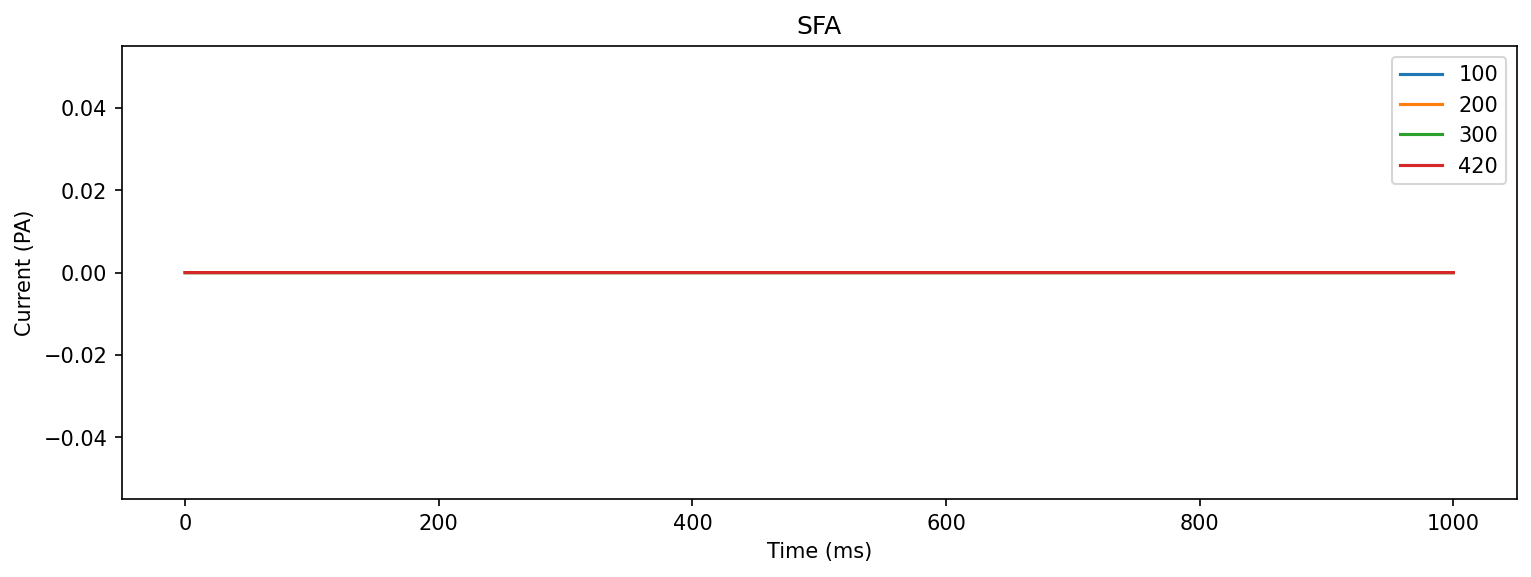

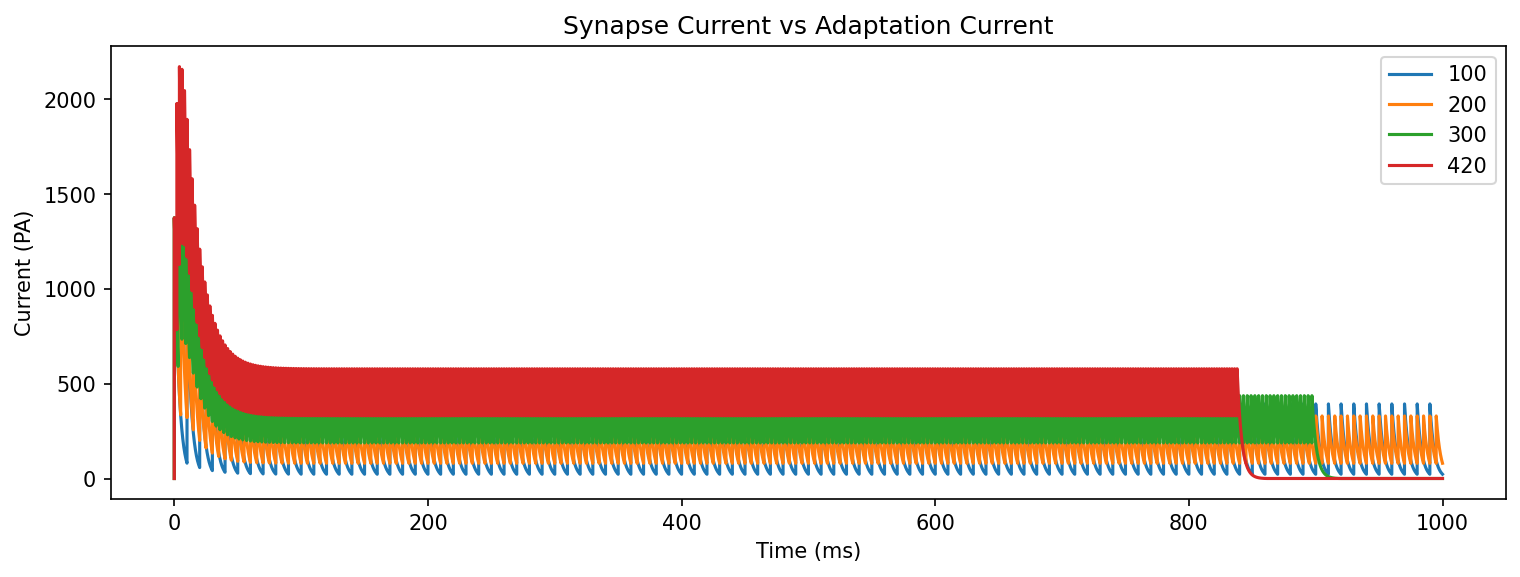

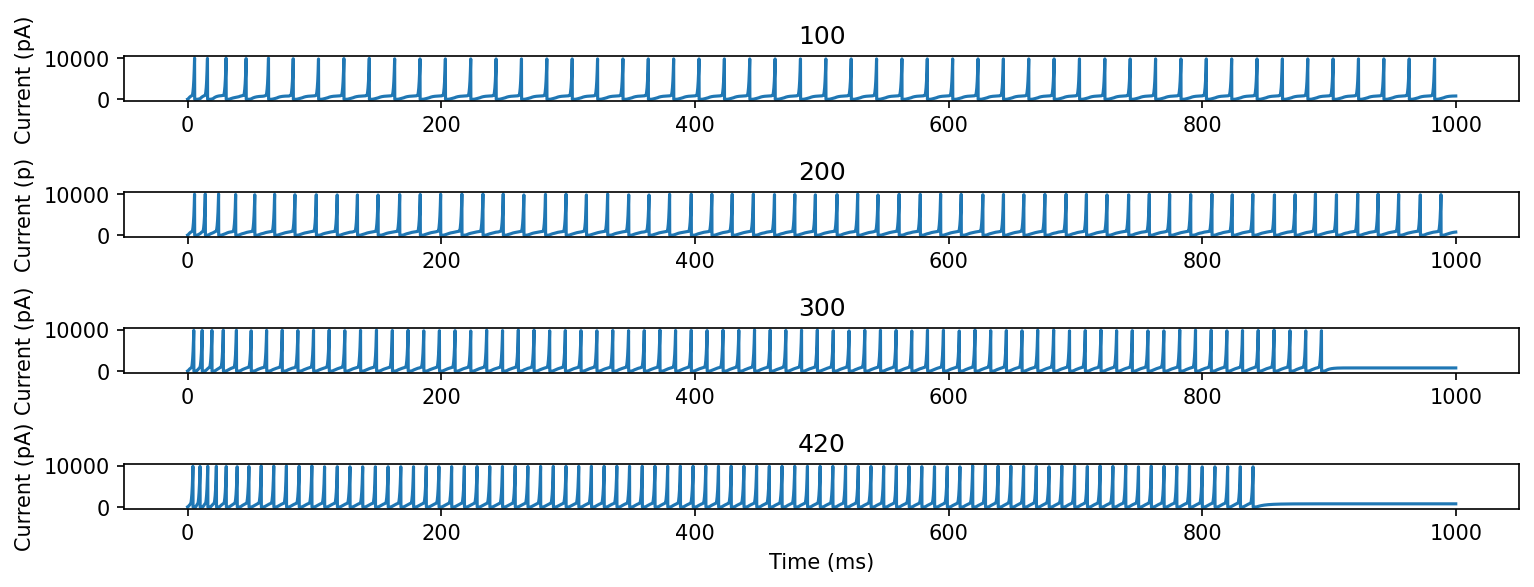

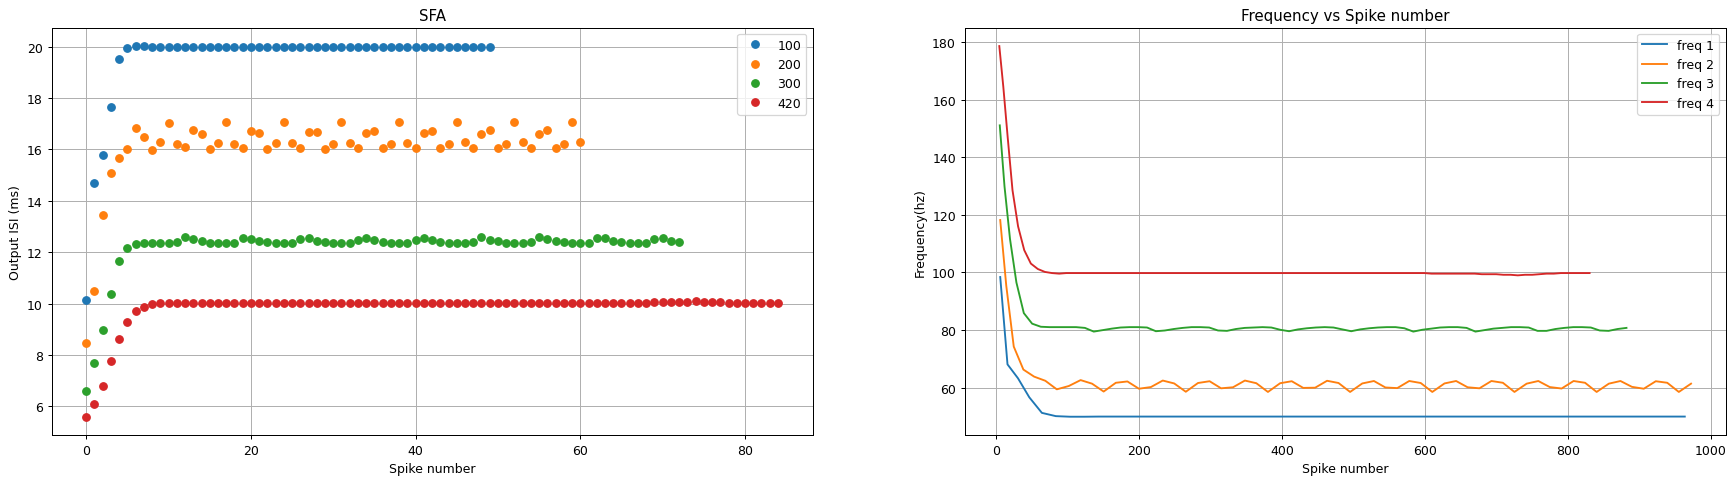

In [22]:
import math

import matplotlib.pyplot as plt
from matplotlib import gridspec

freq_list=[100,200,300,420]


adaptation_conf = {
    "Isoma_dpi_tau" :  7.5* pA,
    "Isoma_th"  : 10* nA,  
    "alpha_soma": 3,
    
    "Isoma_ahp_tau": 11 * pA,             
    "Isoma_ahp_w" : 0 * pA,
    "alpha_ahp"  : 1,  
    
    "soma_refP": 2 * ms,
    "Isoma_const": 300 *pA
                  }

ampa_conf = {        "Iampa_std_tau": 10 * pA,
        "Va" :150*mV,
        "Vw" :150*mV,
        "tau_pulse" : 3 *ms,
        "Idischarge_w":5*pA,


        "Iampa_w0":20*pA}

            
            



[mon_adapt_state,mon_mem_state,o1,o2,o3,o4,DPI_neurons]=SFA(ampa_conf,adaptation_conf,freq_list)






In [91]:
print(100*(max(1/(np.diff(o4.t)))-(1/(np.diff(o4.t))[-1]))/(max(1/(np.diff(o4.t)))))
print(100*(max(1/(np.diff(o3.t)))-(1/(np.diff(o3.t))[-1]))/(max(1/(np.diff(o3.t)))))
print(100*(max(1/(np.diff(o2.t)))-(1/(np.diff(o2.t))[-1]))/(max(1/(np.diff(o2.t)))))
print(100*(max(1/(np.diff(o1.t)))-(1/(np.diff(o1.t))[-1]))/(max(1/(np.diff(o1.t)))))

46.10837438423642
45.901639344262456
34.618755477651206
14.325842696629282


In [59]:
o3.t

<mon_neuron_output_3.t: array([0.01034, 0.01964, 0.02896, 0.03882, 0.04938, 0.06082, 0.073  ,
       0.08572, 0.09884, 0.11216, 0.12548, 0.13896, 0.1525 , 0.16594,
       0.17934, 0.1929 , 0.20644, 0.21988, 0.2333 , 0.24686, 0.2604 ,
       0.27384, 0.28728, 0.30084, 0.31436, 0.32778, 0.34124, 0.3548 ,
       0.36832, 0.38174, 0.3952 , 0.40876, 0.42226, 0.43568, 0.44916,
       0.46274, 0.47624, 0.48966, 0.50314, 0.5167 , 0.5302 , 0.5436 ,
       0.5571 , 0.57068, 0.58416, 0.59756, 0.61106, 0.62464, 0.63812,
       0.65152, 0.66504, 0.67862, 0.69208, 0.70548, 0.719  , 0.73258,
       0.74604, 0.75944, 0.77298, 0.78654, 0.8    , 0.8134 , 0.82694,
       0.8405 , 0.85394, 0.86736, 0.8809 , 0.89446, 0.9079 , 0.92132,
       0.93488, 0.94842, 0.96186, 0.9753 , 0.98886, 1.0024 , 1.01582,
       1.02926, 1.04282, 1.05634, 1.06976, 1.08322, 1.09678, 1.1103 ,
       1.12372, 1.13718, 1.15076, 1.16426, 1.17768, 1.19116, 1.20472,
       1.21822, 1.23164, 1.24512, 1.2587 , 1.27218, 1.28558, 1.299

In [6]:

# Add code here
# to start a new build to run multiple full simulations
tau_list=[10,20,30,40,50]*pA
freq_list=[10,50,100,200,300,500]*Hz
firing_rate=[]
N=10
for tau in tau_list:
    device.reinit()
    device.activate()
    # need to reset the defaultclock after activate
    defaultclock.dt = 20 * us
    
    network = Network()
    chip = DynapSE(network)
    seed(4321)
    # Create a poisson spike generator with 100 Hz
    # Allocate single neuron from Core 1
    DPI_neurons  = chip.get_neurons(len(freq_list), 'Core_1')
    DPI_neurons.Isoma_const = 0 * pA 
    # Define an AMPA synapse to connect the spike generator to the neuron 
    
    # In Brian2 creating a Synapses instance does not create synapses, it only specifies their dynamics.
    # so remember to call connect function to really build the connection
    Spike_Generators=[]
    DPI_synapses=[]
    counter1=0
    counter2=1
    for i in range(len(freq_list)):
        
        Spike_Generators.append(PoissonGroup(1, freq_list[i]))
        DPI_synapses.append(chip.add_connection(Spike_Generators[i],DPI_neurons[counter1:counter2], synapse_type='AMPA'))
        chip.connect(DPI_synapses[i], True)
        DPI_synapses[i].weight = 100 # number of synapse and not weight
        counter1=counter1+1
        counter2=counter2+1
        
        
        
        

    # here we set an initial weight of 200.
    

    ampa_conf_2 = {'Isoma_dpi_tau': tau}

    #increase I_tau
    chip.set_bias(ampa_conf_2,'Core_1')
    chip.set_bias(adaptation_conf,'Core_1')
    chip.set_bias(ampa_conf,'Core_1')

    # monitors
    mon_synapse_state = StateMonitor(DPI_synapses[0], 'Iampa', record=[0]) # it's not I_syn_exc2
    mon_neuron_state  = StateMonitor(DPI_neurons,  'Isoma_mem', record=[0])
    mon_neuron_input  = SpikeMonitor(Spike_Generators[0], name='mon_neuron_input')
    mon_neuron_output = SpikeMonitor(DPI_neurons, name='mon_neuron_output')

    # add all the instances into the network 
    network.add([Spike_Generators, DPI_neurons, DPI_synapses, 
                 mon_synapse_state, mon_neuron_state, mon_neuron_input, mon_neuron_output])
    
    # Simulation
    duration = .5 * second
    network.run(duration)
    print('Output firing rate = ', mon_neuron_output.count/ (duration))
    firing_rate.append(mon_neuron_output.count/ (duration))

6 neurons are allocated from Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
Output firing rate =  [0.084 0.294 0.4   0.478 0.486 0.49 ] kHz
6 neurons are allocated from Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
Output firing rate =  [0.15  0.36  0.424 0.464 0.486 0.49 ] kHz
6 neurons are allocated from Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
Output firing rate =  [0.084 0.294 0.4   0.478 0.486 0.49 ] kHz
6 neurons are allocated from Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
Output firing rate =  [0.096 0.298 0.438 0.478 0.484 0.488] kHz
6 neurons are allocated from Core_1.
New bias values are loaded to Core_1.
New bias values are loaded to Core_1.
New bias values are loaded 

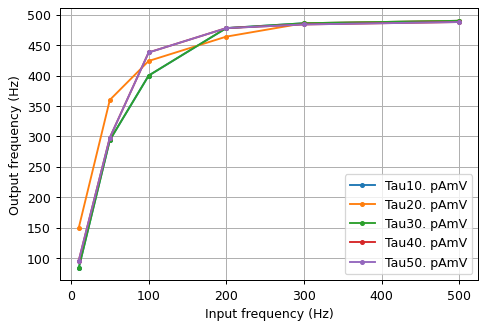

In [7]:
array_fr=np.array(firing_rate)
for i in range(len(firing_rate)):
    plot(freq_list, array_fr[i], ".-",label='Tau'+str(tau_list[i])+'mV')
    grid()
    

xlabel('Input frequency (Hz)')
ylabel('Output frequency (Hz)')
legend(loc='best')
show()
